<a href="https://colab.research.google.com/github/araldi/FS22---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L/blob/main/Week5/LinearModels_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizing the objective functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week5/Week5_statistics_exercise.csv?raw=true')
dictionary = pd.read_csv('https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week3/Week3_homework_dictionary_part1.csv')

Let's check the relationship between IGF-1 and age.

In [2]:
df.head()

,Unnamed: 0,eid,31-0.0,48-0.0,49-0.0,50-0.0,2443-0.0,21002-0.0,21022-0.0,23099-0.0,30740-0.0,30750-0.0,30760-0.0,30770-0.0,30780-0.0
0,281147,3811815,0.0,94.0,109.0,161.0,0.0,84.1,54.0,46.9,5.032,35.6,1.287,24.253,4.501
1,51158,1511686,0.0,67.0,96.0,160.0,0.0,61.9,41.0,28.6,3.671,31.7,1.059,22.127,5.275
2,167746,2677649,0.0,78.0,108.0,167.5,0.0,69.2,55.0,34.7,5.234,25.5,1.423,19.969,3.603
3,381947,4820009,1.0,88.0,101.0,184.0,0.0,79.5,45.0,14.1,4.665,35.1,2.018,28.842,3.060
4,114270,2142869,0.0,76.0,98.0,156.0,0.0,59.0,60.0,25.4,5.192,40.1,1.581,24.269,5.010


In [3]:
dictionary

,Description,Code
0,PatientID,eid
1,Gender,31-0.0
2,Height [cm],50-0.0
3,Weight [Kg],21002-0.0
4,Waist circumference [cm],48-0.0
5,Hip circumference [cm],49-0.0
6,Body_fat_percentage [%],23099-0.0
7,Diabetes diagnosed by doctor,2443-0.0
8,AgeRecruit,21022-0.0
9,Glucose [mmol/L],30740-0.0


In [4]:
df.dropna(subset = ['21022-0.0', '30770-0.0'], inplace =True)

In [18]:
dictionary.loc[dictionary['Code']== '30770-0.0', 'Description'].values[0]

'IGF-1 [nmol/L]'

Text(0, 0.5, 'IGF-1 [nmol/L]')

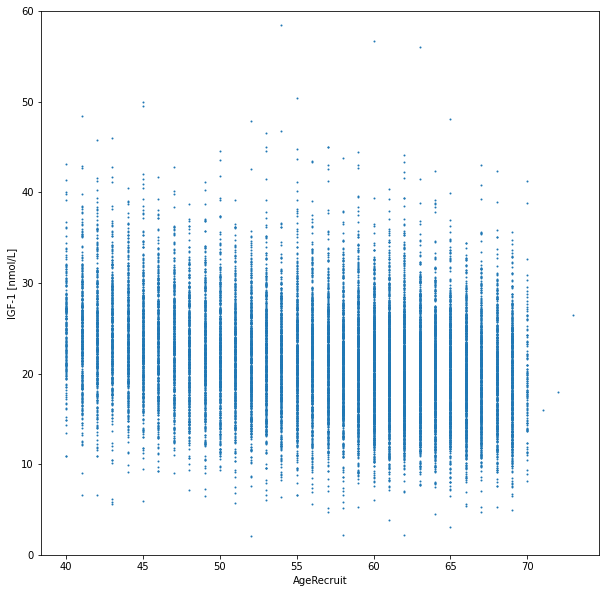

In [19]:
# Let's look at the data
plt.figure(figsize = (10,10))
plt.scatter(df['21022-0.0'], df['30770-0.0'], s=1)
plt.ylim(0, 60)
plt.xlabel(dictionary.loc[dictionary['Code']== '21022-0.0', 'Description'].values[0] )
plt.ylabel(dictionary.loc[dictionary['Code']== '30770-0.0', 'Description'].values[0])

In [20]:
from scipy.optimize import minimize
def line(x, b, a): #function to minimize
    return a * x + b #line equation

def fitfunc(args, x, y):
    a, b = args
    return sum((y - line(a, b, x))**2) # L2 objective function
 
x = df['21022-0.0']
y = df['30770-0.0']
initialGuess = (0, 40)
 
fitfunc(initialGuess, x, y)
solution = minimize(fitfunc, initialGuess, args=(x, y)) # minimize the objective function

In [21]:
solution

      fun: 560153.5217404924
 hess_inv: array([[ 2.43673105e-08, -9.49060204e-07],
       [-9.49060204e-07,  5.56969168e-05]])
      jac: array([-0.1640625,  0.015625 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 300
      nit: 5
     njev: 72
   status: 2
  success: False
        x: array([-0.17716453, 31.45311886])

In [ ]:
a, b = solution['x'][0], solution['x'][1]

Text(0.5, 1.0, 'Linear relationship between IGF-1 and age')

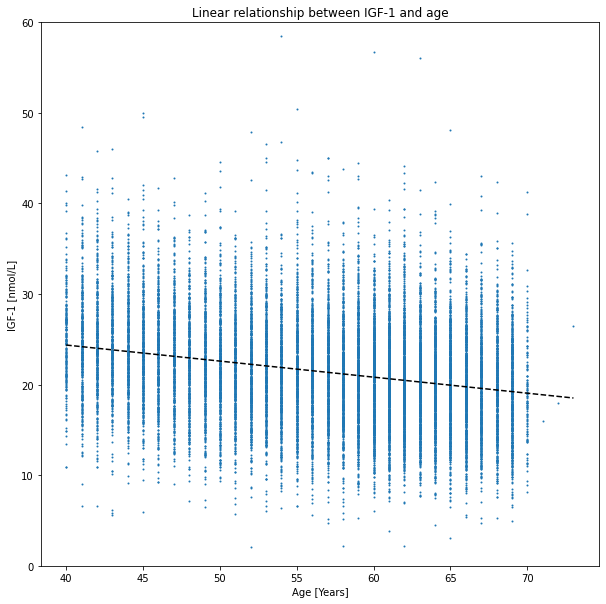

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df['21022-0.0'], df['30770-0.0'], s=2, c='brown', alpha = 0.1)
plt.ylim(0, 60)

x = np.linspace(df['21022-0.0'].min(), df['21022-0.0'].max())
y = a * x + b

plt.plot(x, y, color = 'k', linestyle = '--')
plt.xlabel('Age [Years]')
plt.ylabel('IGF-1 [nmol/L]')
plt.title('Linear relationship between IGF-1 and age')

In [ ]:
def line(a, b, c, x): #function to minimize
    return a * x**2 + b * x + c #second order equation

def fitfunc(args, x, y):
    a, b, c = args
    return sum((y - line(a, b, c, x))**2) # L2 objective function
                                          # sum of squared residuals
 
x = df['21022-0.0']
y = df['30770-0.0']
initialGuess = (1, 1, 1)
 
fitfunc(initialGuess, x, y)
solution = minimize(fitfunc, initialGuess, args=(x, y)) # minimize the objective function

In [ ]:
solution

      fun: 2256680.0719500724
 hess_inv: array([[ 1.39949162e-10,  5.24954243e-11,  2.67619374e-11],
       [ 5.24954243e-11,  5.10661778e-11, -7.59152224e-11],
       [ 2.67619374e-11, -7.59152224e-11,  2.43727046e-10]])
      jac: array([ 1.46875,  1.25   , -3.84375])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 510
      nit: 14
     njev: 100
   status: 2
  success: False
        x: array([-11.69606109,  21.4150994 ,   1.5733823 ])

Text(0.5, 1.0, 'Second order relationship between IGF-1 and age')

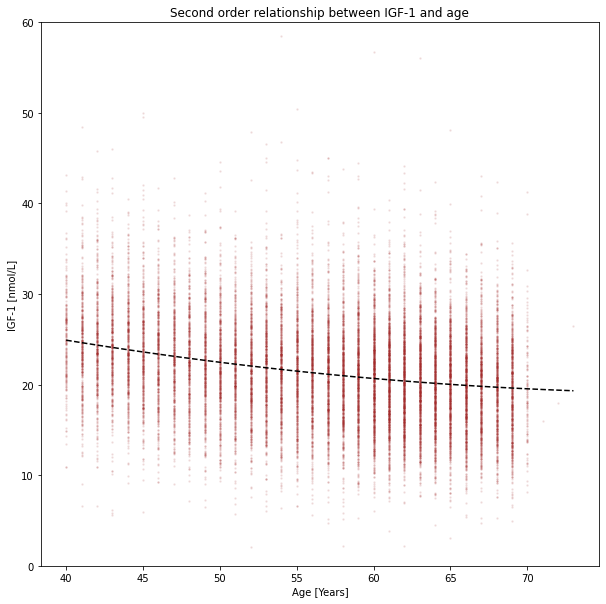

In [ ]:
a, b, c = solution['x'][0], solution['x'][1], solution['x'][2]

x = df['21022-0.0']
y = df['30770-0.0']

plt.figure(figsize = (10,10))
plt.scatter(df['21022-0.0'], df['30770-0.0'], s=2, c='brown', alpha = 0.1)
plt.ylim(0, 60)

x = np.linspace(df['21022-0.0'].min(), df['21022-0.0'].max())
y = a * x**2 + b * x + c

plt.plot(x, y, color = 'k', linestyle = '--')
plt.xlabel('Age [Years]')
plt.ylabel('IGF-1 [nmol/L]')
plt.title('Second order relationship between IGF-1 and age')

### Use np.polyfit

In [ ]:
# first order with polyfit
x = df['21022-0.0']
y = df['30770-0.0']
args = np.polyfit(x,y,1)

Text(0.5, 1.0, 'Linear relationship between IGF-1 and age')

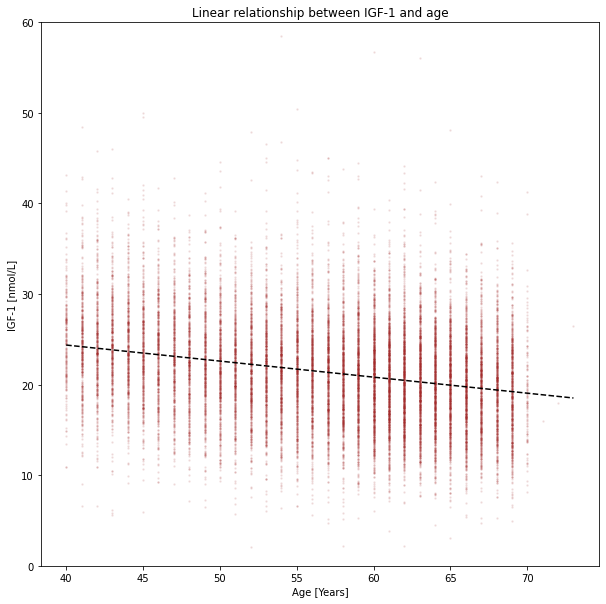

In [ ]:
a, b = args
plt.figure(figsize = (10,10))
plt.scatter(df['21022-0.0'], df['30770-0.0'], s=2, c='brown', alpha = 0.1)
plt.ylim(0, 60)

x = np.linspace(df['21022-0.0'].min(), df['21022-0.0'].max())
y = a * x + b

plt.plot(x, y, color = 'k', linestyle = '--')
plt.xlabel('Age [Years]')
plt.ylabel('IGF-1 [nmol/L]')
plt.title('Linear relationship between IGF-1 and age')

In [ ]:
# second order with polyfit
x = df['21022-0.0']
y = df['30770-0.0']
args = np.polyfit(x,y,2)

Text(0.5, 1.0, 'Second order relationship between IGF-1 and age')

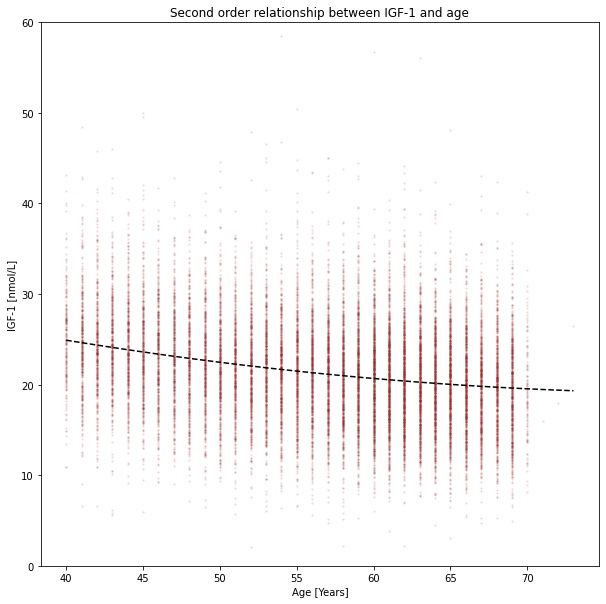

In [ ]:
a, b, c = args

plt.figure(figsize = (10,10))
plt.scatter(df['21022-0.0'], df['30770-0.0'], s=2, c='brown', alpha = 0.1)
plt.ylim(0, 60)

x = np.linspace(df['21022-0.0'].min(), df['21022-0.0'].max())
y = a * x**2 + b * x + c

plt.plot(x, y, color = 'k', linestyle = '--')
plt.xlabel('Age [Years]')
plt.ylabel('IGF-1 [nmol/L]')
plt.title('Second order relationship between IGF-1 and age')

# Multiple linear regression

In [22]:
dictionary['Description_cols'] = dictionary['Description'].str.split(' ').str[0]

In [23]:
dict_columns = {}
for index, value in enumerate(dictionary['Code']):
  dict_columns[value] = dictionary.loc[index, "Description_cols"]

In [24]:
df.rename(columns = dict_columns, inplace = True)

In [25]:
dictionary

,Description,Code,Description_cols
0,PatientID,eid,PatientID
1,Gender,31-0.0,Gender
2,Height [cm],50-0.0,Height
3,Weight [Kg],21002-0.0,Weight
4,Waist circumference [cm],48-0.0,Waist
5,Hip circumference [cm],49-0.0,Hip
6,Body_fat_percentage [%],23099-0.0,Body_fat_percentage
7,Diabetes diagnosed by doctor,2443-0.0,Diabetes
8,AgeRecruit,21022-0.0,AgeRecruit
9,Glucose [mmol/L],30740-0.0,Glucose


In [26]:
# prepare the data
df = df.dropna()

### Test the assumptions

In [ ]:
# check covariance

sns.pairplot(df.select_dtypes(exclude = 'int64'))
# took 2 minutes to run

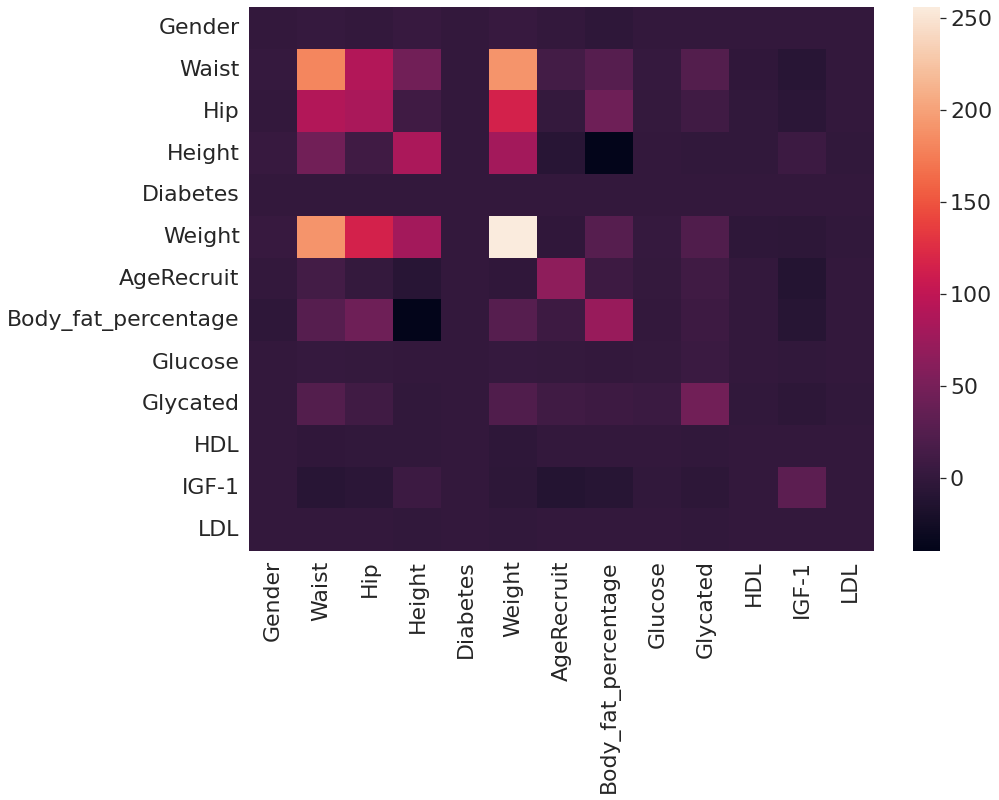

In [29]:
import seaborn as sns
# Plot heatmap for feature covariance
plt.figure(figsize = (14,10))
sns.set(font_scale = 2)
s = sns.heatmap(df.select_dtypes(exclude = 'int64').cov())

In [34]:
# importing module
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fitting the data
mod = smf.ols(formula='Glycated ~ Glucose', data=df)

res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Glycated   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                 1.222e+04
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:01:00   Log-Likelihood:                -48337.
No. Observations:               15858   AIC:                         9.668e+04
Df Residuals:                   15856   BIC:                         9.669e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.9901      0.169    106.654      0.000      17.659      18.321
Glucose        3.5264      0.032    110.558      0.000       3.464       3.589
==============================================================================
Omnibus:                     6260.873   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87354.369
Skew:                           1.511   Prob(JB):                         0.00
Kurtosis:                      14.094   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

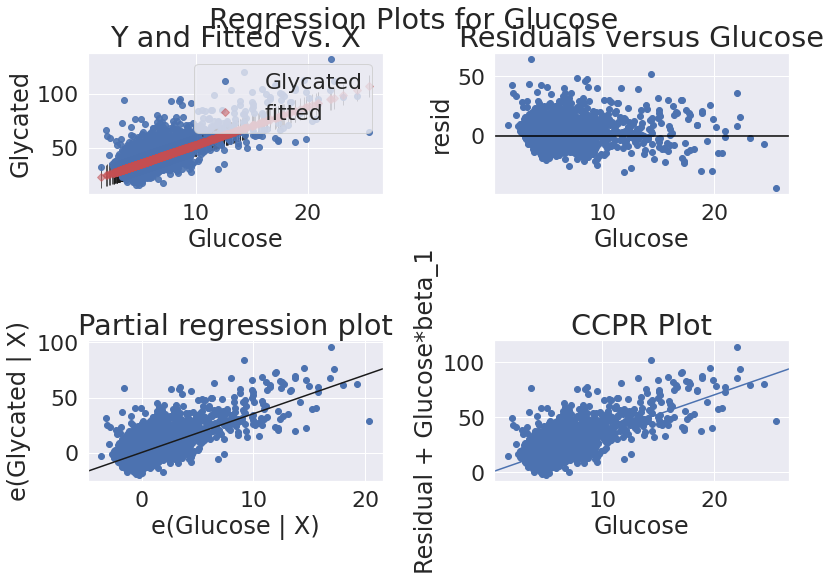

In [39]:
import statsmodels.api as sm

# Check the residuals for glucose
# according to assumptions, they have to be normally distributed

#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(res, 'Glucose', fig=fig)
plt.show()

In [41]:
# standardize the data
def standardize(x):
  return (x - np.mean(x))/np.std(x)

In [42]:
for i in df.select_dtypes(exclude = 'int64'):
  df[i] = standardize(df[i])


In [43]:
df.select_dtypes(exclude = 'int64'). describe()

,Gender,Waist,Hip,Height,Diabetes,Weight,AgeRecruit,Body_fat_percentage,Glucose,Glycated,HDL,IGF-1,LDL
count,1.585800e+04,1.585800e+04,1.585800e+04,1.585800e+04,1.585800e+04,1.585800e+04,1.585800e+04,1.585800e+04,1.585800e+04,1.585800e+04,1.585800e+04,1.585800e+04,1.585800e+04
mean,4.438372e-16,4.435711e-16,-1.887127e-16,2.136470e-14,8.426962e-16,-2.557516e-14,1.466295e-16,9.676975e-15,-3.084738e-14,4.372804e-14,1.337280e-14,2.853926e-14,-8.344452e-15
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-9.280450e-01,-2.626174e+00,-3.421091e+00,-4.162572e+00,-1.254481e+01,-2.763349e+00,-2.054396e+00,-3.073664e+00,-2.828735e+00,-3.019819e+00,-2.799609e+00,-3.415880e+00,-3.469309e+00
25%,-9.280450e-01,-6.956911e-01,-6.938319e-01,-7.075882e-01,-1.962317e-01,-7.310893e-01,-8.196420e-01,-7.337151e-01,-4.139828e-01,-4.852728e-01,-7.281879e-01,-6.851225e-01,-7.088154e-01
50%,-9.280450e-01,-2.744716e-02,-1.483801e-01,-5.977878e-02,-1.962317e-01,-1.120318e-01,1.681610e-01,-4.343026e-02,-1.564408e-01,-1.316152e-01,-1.300097e-01,-1.738770e-02,-3.742146e-02
75%,1.077534e+00,6.407968e-01,5.061621e-01,6.959989e-01,-1.962317e-01,6.008222e-01,7.855380e-01,7.287528e-01,1.389055e-01,2.515138e-01,6.066116e-01,6.100848e-01,6.526303e-01
max,1.077534e+00,4.947258e+00,7.706126e+00,3.719110e+00,3.919962e+00,7.304151e+00,2.020292e+00,3.407994e+00,1.603090e+01,1.416204e+01,6.034622e+00,1.284868e+01,5.327989e+00


In [44]:
# importing module
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fitting the data
mod = smf.ols(formula='Glycated ~ Glucose', data=df)

res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Glycated   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                 1.222e+04
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:04:01   Log-Likelihood:                -17970.
No. Observations:               15858   AIC:                         3.594e+04
Df Residuals:                   15856   BIC:                         3.596e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.399e-14      0.006   1.07e-11      1.000      -0.012       0.012
Glucose        0.6598      0.006    110.558      0.000       0.648       0.671
==============================================================================
Omnibus:                     6260.873   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87354.369
Skew:                           1.511   Prob(JB):                         0.00
Kurtosis:                      14.094   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise
Play around with independent variables to get the best possible model that describes (and predicts) glucose and LDL

In [ ]:
# example
mod = smf.ols(formula='Glycated ~ Glucose + Q("IGF-1") + AgeRecruit', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Glycated   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     6193.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:52:56   Log-Likelihood:                -48291.
No. Observations:               15858   AIC:                         9.659e+04
Df Residuals:                   15855   BIC:                         9.661e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5974      0.237     82.668      0.000      19.133      20.062
Glucose        3.5006      0.032    109.680      0.000       3.438       3.563
Q("IGF-1")    -0.0690      0.007     -9.621      0.000      -0.083      -0.055
==============================================================================
Omnibus:                     6294.586   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89444.410
Skew:                           1.516   Prob(JB):                         0.00
Kurtosis:                      14.233   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""